In [0]:
import copy
import numpy as np
import matplotlib.pyplot as plt

 **Automatas celulares**
 
   

1. Clase I. La evolución lleva a una configuración estable y homogénea, es decir, todas las células terminan por llegar al mismo valor.
2. Clase II. La evolución lleva a un conjunto de estructuras simples que son estables o periódicas.
3. Clase III. La evolución lleva a un patrón caótico.
4. Clase IV. La evolución lleva a estructuras aisladas que muestran un comportamiento complejo (es decir, ni completamente caótico, ni completamente ordenado, sino en la línea entre uno y otro, este suele ser el tipo de comportamiento más interesante que un sistema dinámico puede presentar).

In [0]:

def genera_tabla(k: int):
    binario = ("{:0" + str(k) + "b}").format
    for n in range(2**k):
        yield tuple(map(int, binario(n)))

    

In [0]:
list(genera_tabla(3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [0]:
def func_transicion(n: int):
    digitos = []
    while n > 0:
        n, r = divmod(n, 2)
        digitos.append(r)
    if len(digitos) < 8:
        digitos += [0]*(8 - len(digitos))
    return dict(zip(genera_tabla(3), digitos))
  

In [0]:
#func_transicion(50)
func = func_transicion(50)
func
#func.keys()
#func[(0, 1, 0)]

{(0, 0, 0): 0,
 (0, 0, 1): 1,
 (0, 1, 0): 0,
 (0, 1, 1): 0,
 (1, 0, 0): 1,
 (1, 0, 1): 1,
 (1, 1, 0): 0,
 (1, 1, 1): 0}

In [0]:
A = [0,1,0,0,1,0,1,1]
print(A[-2:].append(A[0]))


None


In [0]:
def transicion(A: list, func: dict):
    
    nuevo = []
    nuevo.append(func[(A[len(A)-1],A[0],A[1])])
    for i in range(len(A) - 2):
      #print(A[i: i + 3])
        llave = tuple(A[i: i + 3])
        nuevo.append(func[(llave)])
        if(i == len(A) - 2):
        #print(A[i:divmod (i, len(A))])
            llave = tuple(A[i:divmod (i, len(A))])
            nuevo.append(func[(llave)])
    nuevo.append(func[(A[len(A)-2], A[len(A)-1], A[0])])
    return nuevo
transicion(A, func)
  
  

[1, 0, 1, 1, 0, 1, 0, 0]

In [0]:
def paso(func: dict, A: list) -> list:
    copia, n = func.copy(), len(A)
    for k in range(n):
        vecinos = [(k + 1) % n for i in range (-1, 2)]
        copia[k] = func[tuple(A[j] for j in range (vecinos))]
    return copia    

In [0]:
"""
regla50 = func_transicion(50)
config = [0]*200 + [1] + [0]*20
historia = []
for i in range(5):
    configuracion = paso(regla50, configuracion)
    historia.append(config)
    config = func(config, func_transicion(110))        #computo universal
historia.append(config)

"""

config18 = [0]*200 + [1] + [0]*200
config30 = [0]*200 + [1] + [0]*200
config50 = [0]*200 + [1] + [0]*200
config110 = [0]*200 + [1] + [0]*200
historia18 = []
historia30 = []
historia50 = []
historia110 = []

for _ in range(400):
    historia18.append(config18)
    config18 = transicion(config18, func_transicion(18))     #fractales
    #config = transicion(config, func_transicion(30))        #aleatoridad
  #config = transicion(config, func_transicion(110))         #computo universal
historia18.append(config18)

for _ in range(400):
    historia30.append(config30)
    #config = transicion(config, func_transicion(18))        #fractales
    config30 = transicion(config30, func_transicion(30))     #aleatoridad
  #config = transicion(config, func_transicion(110))         #computo universal
historia30.append(config30)

for _ in range(400):
    historia50.append(config50)
    #config = transicion(config, func_transicion(18))        #fractales
    config50 = transicion(config50, func_transicion(50))     #aleatoridad
  #config = transicion(config, func_transicion(110))         #computo universal
historia50.append(config50)


for _ in range(400):
    historia110.append(config110)
    #config = transicion(config, func_transicion(18))        #fractales
    config110 = transicion(config110, func_transicion(110))  #aleatoridad
  #config = transicion(config, func_transicion(110))         #computo universal
historia110.append(config110)
  

In [0]:
def genera_regla(N):
    #regla = func_transicion(N)
    config = [0]*200 + [1] + [0]*200
    historia = []
    for _ in range(400):
        historia.append(config)
        config = transicion(config, func_transicion(N))  #aleatoridad
    historia.append(config)
    
    return historia


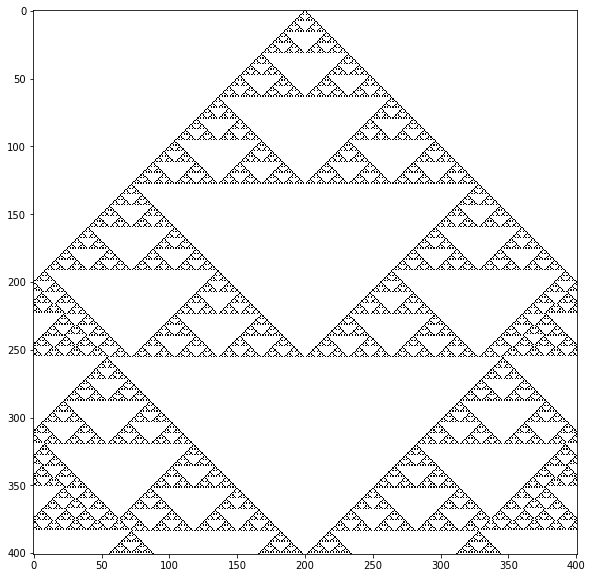

In [0]:
regla = genera_regla(50)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(historia18, dtype=np.int8), cmap='binary')


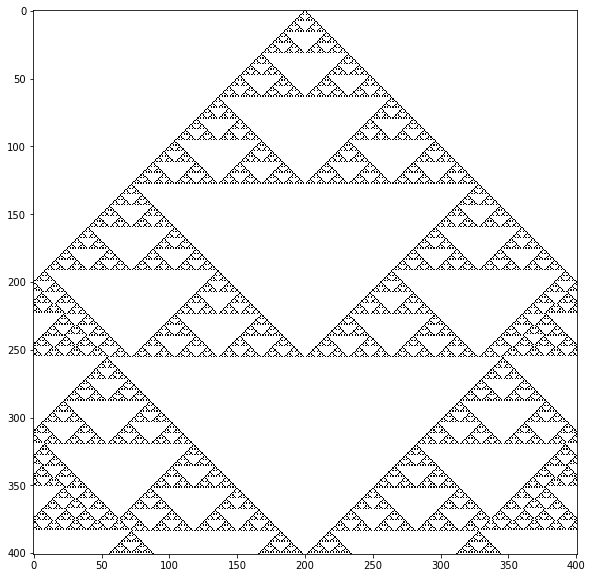

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(historia18, dtype=np.int8),
         cmap='binary')

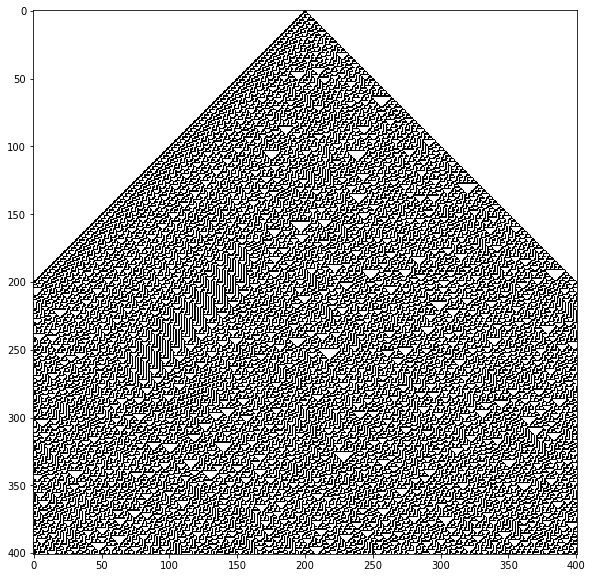

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(historia30, dtype=np.int8),
         cmap='binary')

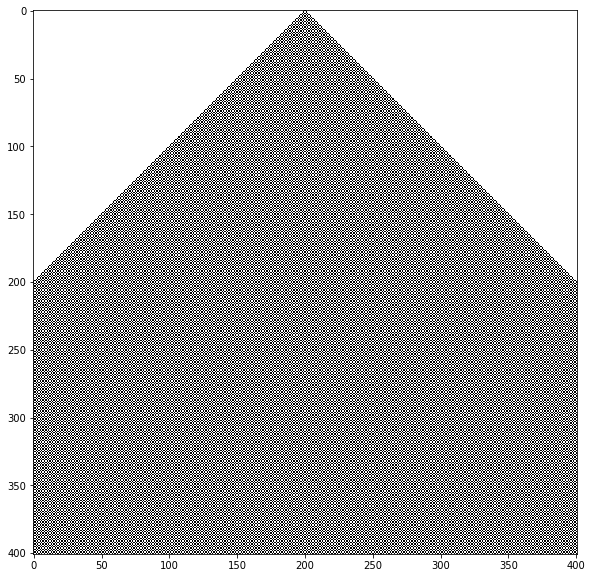

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(historia50, dtype=np.int8),
         cmap='binary')

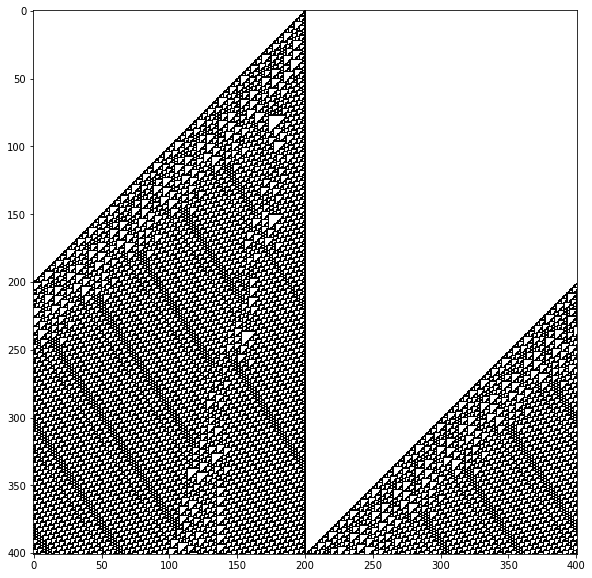

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.array(historia110, dtype=np.int8),
         cmap='binary')

# **Fractales**

Algunos automatas presentan un nivel de fractalidad fraccionaria a diferencia de lo conocido donde un fractal tiene fractalidad entera, trataremos de analizar la fractalidad de estos automatas celulares.

In [0]:
def conteo(historia):
    conteo = 0
    for i, renglon in enumerate(historia, 1):
        conteo += sum(renglon)
        yield i, i**2, conteo


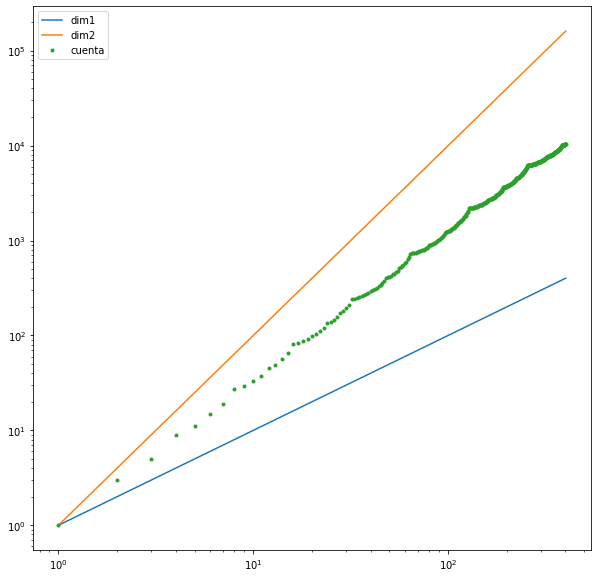

In [0]:
x, d, cuenta = zip(*conteo(historia18))
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x, x, label = "dim1")
ax.plot(x, d, label = "dim2")
ax.plot(x, cuenta, ".",label = "cuenta" )
ax.set_xscale(value="log")
ax.set_yscale(value="log")
ax.legend()